In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
# Загружаем данные о производственном процессе и состоянии оборудования
# Данные взяты из [2]
data = pd.read_csv('data/ai4i2020.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
# Преобразуем данные в удобный формат
# Кодируем категориальные переменные с помощью one-hot encoding
# Удаляем ненужные столбцы
data = data.drop(['UDI','Product ID'], axis=1)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


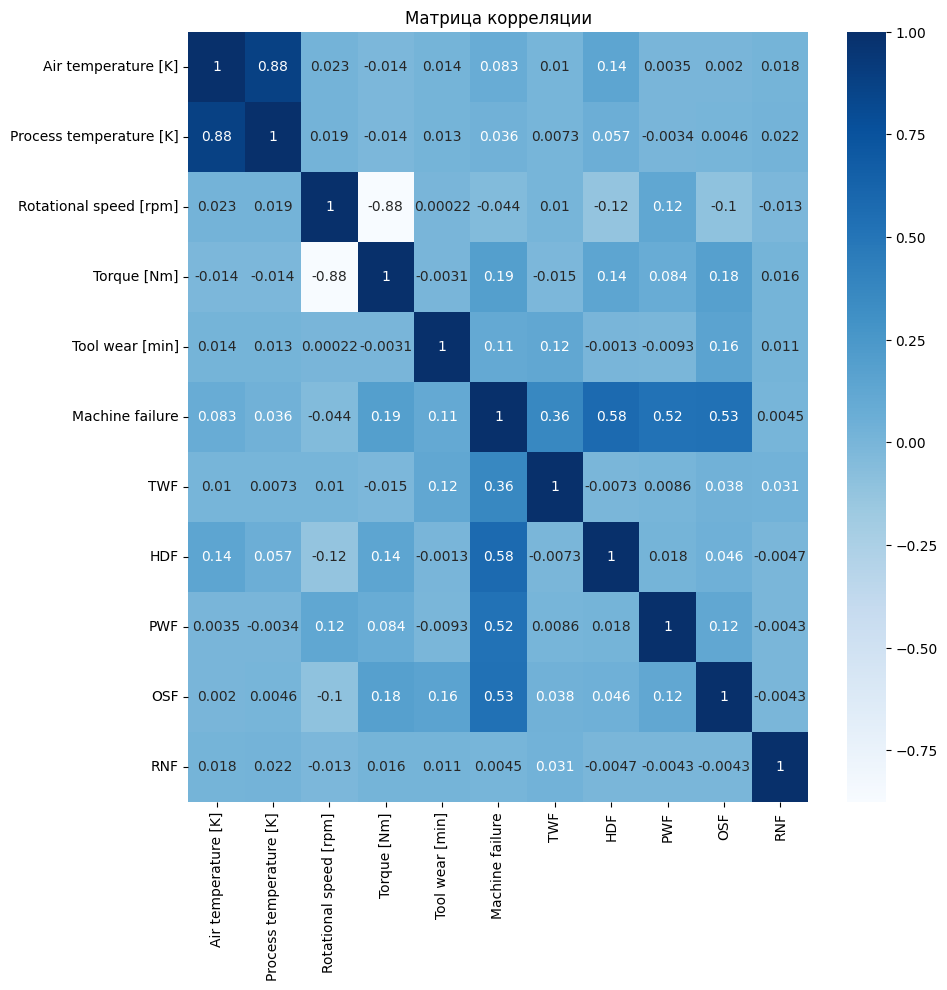

In [3]:
# Визуализируем данные, выявляем закономерности и аномалии
# Строим матрицу корреляции для количественных переменных
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Матрица корреляции')
plt.show()

In [9]:
# Выбираем подходящую модель машинного обучения для предиктивного обслуживания оборудования
# Так как задача заключается в предсказании отказа оборудования (да или нет), то это задача бинарной классификации
# Для простоты выберем случайный лес как базовую модель
# Разделяем данные на обучающую и тестовую выборки
X = data.drop(['Type','Machine failure','TWF'], axis=1) # признаки
y = data['Machine failure'] # целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42) # разбиение на выборки

In [10]:
model = RandomForestClassifier() # создаем модель
model.fit(X_train, y_train) # обучаем модель
# Применяем обученную модель для предиктивного обслуживания оборудования на тестовой выборке
y_pred = model.predict(X_test) # делаем предсказания
# Анализируем результаты предиктивного обслуживания и создаем систему оповещений и реагирования
# Оцениваем качество модели с помощью различных метрик
print('Отчет по классификации:')
print(classification_report(y_test, y_pred))
print('Матрица ошибок:')
print(confusion_matrix(y_test, y_pred))
print('Точность модели:')
print(accuracy_score(y_test, y_pred))

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       0.98      0.80      0.88        61

    accuracy                           0.99      2000
   macro avg       0.99      0.90      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Матрица ошибок:
[[1938    1]
 [  12   49]]
Точность модели:
0.9935


In [11]:
# Создаем функцию для оповещения о проблемах и реагирования на отказы
def alert_and_react(y_true, y_pred):
# Сравниваем реальный и предсказанный отказ оборудования
    if y_true == y_pred: # если отказы совпадают
        print('Все в порядке, оборудование работает нормально.') # выводим сообщение
    else: # если отказы не совпадают
        print('Обнаружен отказ, оборудование нуждается в обслуживании.') #выводим сообщение
        print('Необходимо определить тип неисправности и произвести ремонт.')
# выводим рекомендацию
# Применяем функцию для каждого случая на тестовой выборке
for i in range(len(y_test)):
    print('Тестовый случай №', i+1)
    alert_and_react(y_test.iloc[i], y_pred[i])
    print()

Тестовый случай № 1
Все в порядке, оборудование работает нормально.

Тестовый случай № 2
Обнаружен отказ, оборудование нуждается в обслуживании.
Необходимо определить тип неисправности и произвести ремонт.

Тестовый случай № 3
Все в порядке, оборудование работает нормально.

Тестовый случай № 4
Все в порядке, оборудование работает нормально.

Тестовый случай № 5
Все в порядке, оборудование работает нормально.

Тестовый случай № 6
Обнаружен отказ, оборудование нуждается в обслуживании.
Необходимо определить тип неисправности и произвести ремонт.

Тестовый случай № 7
Все в порядке, оборудование работает нормально.

Тестовый случай № 8
Все в порядке, оборудование работает нормально.

Тестовый случай № 9
Все в порядке, оборудование работает нормально.

Тестовый случай № 10
Все в порядке, оборудование работает нормально.

Тестовый случай № 11
Все в порядке, оборудование работает нормально.

Тестовый случай № 12
Все в порядке, оборудование работает нормально.

Тестовый случай № 13
Все в поря

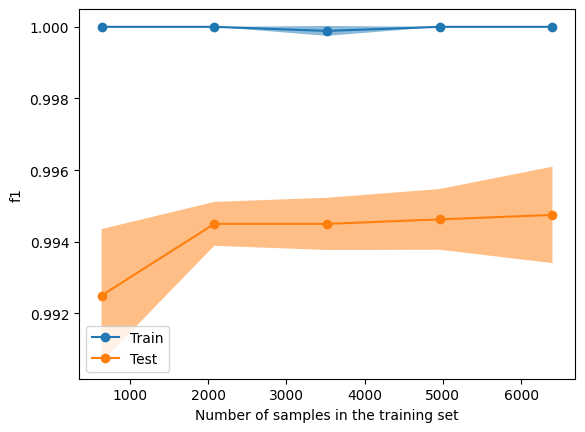

In [15]:
from sklearn.model_selection import LearningCurveDisplay
common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "f1",
}
LearningCurveDisplay.from_estimator(model, **common_params)

как видно на графике скор на валидационной выборке рос, значит обучение шло правильно